<a href="https://colab.research.google.com/github/drskprabhakar/AI-ML-DL-colab-notebooks-coding-models/blob/main/mild_DR_moderate_DR_CNN_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import os
import numpy as np
os.listdir('/content/drive/MyDrive/Diabetic retinopathy mild moderate/split')

['train', 'val', 'test']

In [5]:
os.listdir('/content/drive/MyDrive/Diabetic retinopathy mild moderate/split/train')

['Mild', 'Moderate']

In [7]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1/255)

trainimages = datagen.flow_from_directory('/content/drive/MyDrive/Diabetic retinopathy mild moderate/split/train',target_size=(64,64))
valimages = datagen.flow_from_directory('/content/drive/MyDrive/Diabetic retinopathy mild moderate/split/val',target_size=(64,64))
testimages = datagen.flow_from_directory('/content/drive/MyDrive/Diabetic retinopathy mild moderate/split/test',target_size=(64,64))

Found 1163 images belonging to 2 classes.
Found 108 images belonging to 2 classes.
Found 98 images belonging to 2 classes.


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([Conv2D(32,(3,3), activation='relu', input_shape=(64,64,3)),
                    MaxPooling2D(2,2),

                    Conv2D(64,(3,3), activation='relu'),
                    MaxPooling2D(2,2),

                    Flatten(),
                    Dense(128, activation='relu'),
                    Dense(1, activation='sigmoid')])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

In [53]:
model.fit(trainimages, batch_size=32, epochs=20, validation_data=valimages)
model.save('mild_moderate_DRCNN_model.keras')

Epoch 1/20
37/37 [==============================] - 19s 496ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/20
37/37 [==============================] - 16s 432ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/20
37/37 [==============================] - 12s 325ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/20
37/37 [==============================] - 13s 332ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/20
37/37 [==============================] - 13s 348ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 6/20
37/37 [==============================] - 12s 324ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 7/20
37/37 [==============================] - 15s 407ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000

In [83]:
predictions = model.predict(testimages)

4/4 [==============================] - 1s 186ms/step


In [84]:
predictions[predictions<0.5]=0
predictions[predictions>0.5]=1

In [22]:
y_true = testimages.classes

In [82]:
from sklearn import metrics
metrics.confusion_matrix(y_true, predictions)

array([[18,  9],
       [43, 28]])

In [90]:
print(metrics.classification_report(y_true, predictions, target_names=['Mild DR', 'Moderate DR'] ))

              precision    recall  f1-score   support

     Mild DR       0.31      0.70      0.43        27
 Moderate DR       0.78      0.41      0.54        71

    accuracy                           0.49        98
   macro avg       0.55      0.56      0.48        98
weighted avg       0.65      0.49      0.51        98



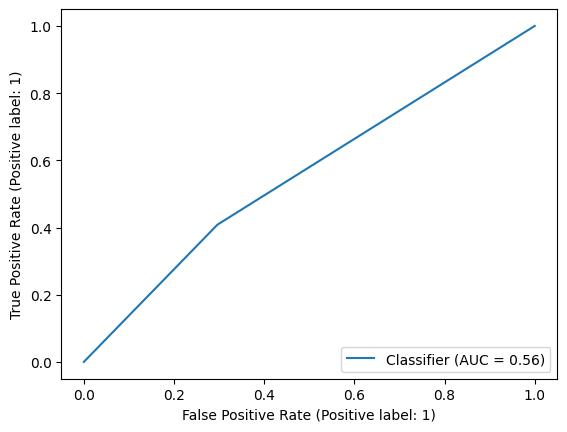

In [86]:
metrics.RocCurveDisplay.from_predictions(y_true, predictions)

In [89]:
testimages.class_indices

{'Mild': 0, 'Moderate': 1}

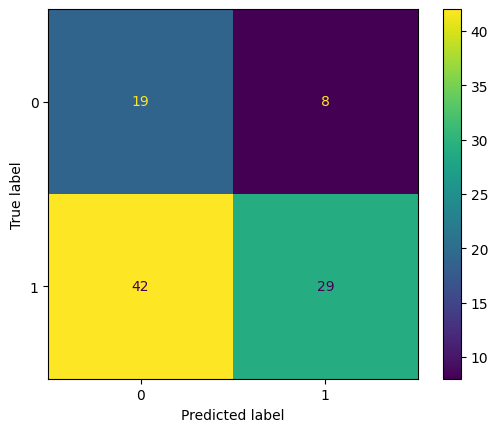

In [87]:
metrics.ConfusionMatrixDisplay.from_predictions(y_true, predictions)

1/1 [==============================] - 0s 176ms/step
Prediction: Mild DR


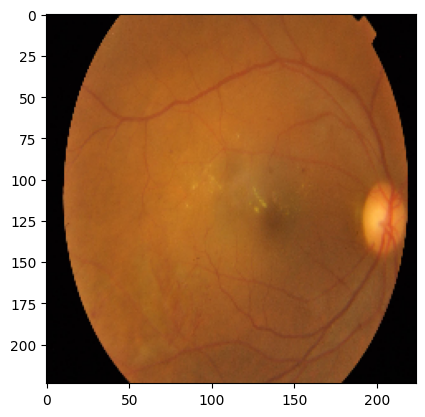

In [95]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Load the trained CNN model
model = load_model('/content/mild_moderate_DRCNN_model.keras')  # Provide the path to your trained model file

# Define a function to predict unknown images
def predict_unknown_image(image_path):
    img = image.load_img(image_path, target_size=(64,64))  # Assuming images are resized to 150x150
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions to match batch size
    img_array /= 255.0  # Normalize pixel values

    prediction = model.predict(img_array)
    if prediction[0][0] > 0.5:
        return "Moderate DR"  # Example class names, modify as per your binary classes
    else:
        return "Mild DR"

# Example usage:
unknown_image_path = "/content/drive/MyDrive/Diabetic retinopathy mild moderate/split/test/Mild/172df1330a60.png"  # Provide the path to the unknown image
prediction = predict_unknown_image(unknown_image_path)
print("Prediction:", prediction)

import matplotlib.pyplot as plt
testimage = image.load_img('/content/drive/MyDrive/Diabetic retinopathy mild moderate/split/test/Mild/172df1330a60.png')
plt.imshow(testimage)

1/1 [==============================] - 0s 88ms/step
Prediction: Moderate DR


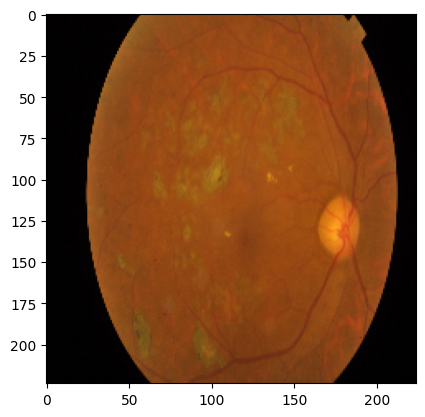

In [96]:
# Example usage:
unknown_image_path = "/content/drive/MyDrive/Diabetic retinopathy mild moderate/split/test/Moderate/041f09eec1e8.png"  # Provide the path to the unknown image
prediction = predict_unknown_image(unknown_image_path)
print("Prediction:", prediction)

import matplotlib.pyplot as plt
testimage = image.load_img('/content/drive/MyDrive/Diabetic retinopathy mild moderate/split/test/Moderate/041f09eec1e8.png')
plt.imshow(testimage)

In [ ]:
# Example usage:
unknown_image_path = ""  # Provide the path to the unknown image
prediction = predict_unknown_image(unknown_image_path)
print("Prediction:", prediction)

import matplotlib.pyplot as plt
testimage = image.load_img('')
plt.imshow(testimage)

In [ ]:
# Example usage:
unknown_image_path = ""  # Provide the path to the unknown image
prediction = predict_unknown_image(unknown_image_path)
print("Prediction:", prediction)

import matplotlib.pyplot as plt
testimage = image.load_img('')
plt.imshow(testimage)

In [ ]:
# Example usage:
unknown_image_path = ""  # Provide the path to the unknown image
prediction = predict_unknown_image(unknown_image_path)
print("Prediction:", prediction)

import matplotlib.pyplot as plt
testimage = image.load_img('')
plt.imshow(testimage)

In [ ]:
# Example usage:
unknown_image_path = ""  # Provide the path to the unknown image
prediction = predict_unknown_image(unknown_image_path)
print("Prediction:", prediction)

import matplotlib.pyplot as plt
testimage = image.load_img('')
plt.imshow(testimage)

In [ ]:
# Example usage:
unknown_image_path = ""  # Provide the path to the unknown image
prediction = predict_unknown_image(unknown_image_path)
print("Prediction:", prediction)

import matplotlib.pyplot as plt
testimage = image.load_img('')
plt.imshow(testimage)